## Week 4: Data Visualization
In this notebook, we will explore visualization techniques for data analysis.

In [1]:
# Import necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

As we saw last week, we will download a dataset from Kaggle and load it in Python using `pandas`.

In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
#path = kagglehub.dataset_download("ignacioazua/world-gdp-population-and-co2-emissions-dataset")

print("Path to dataset files:", path)

print("Path to dataset files:", path) # Path to the downloaded folder 
filename = os.listdir(path)
print(filename) # Shows content of the folder
#filepath=os.path.join(path, "World_GDP_Population_CO2_Emissions_Dataset.csv")
filepath=os.path.join(path, "Housing.csv")
print(filepath)

Path to dataset files: /home/cgraiff/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1
Path to dataset files: /home/cgraiff/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1
['Housing.csv']
/home/cgraiff/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1/Housing.csv


In [3]:
# Open dataset as pandas dataframe
df = pd.read_csv(filepath) 
# Visualize the first 5 rows of dataframe
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


First of all, let's check if the dataset has missing values.

In [19]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
df["area"].value_counts()

area
6000    24
3000    14
4500    13
4000    11
6600     9
        ..
3360     1
1700     1
3649     1
2990     1
3620     1
Name: count, Length: 284, dtype: int64

Before delving into visualization libraries, we can see already that `pandas` offers a function for visualizing data:

<Axes: xlabel='price', ylabel='area'>

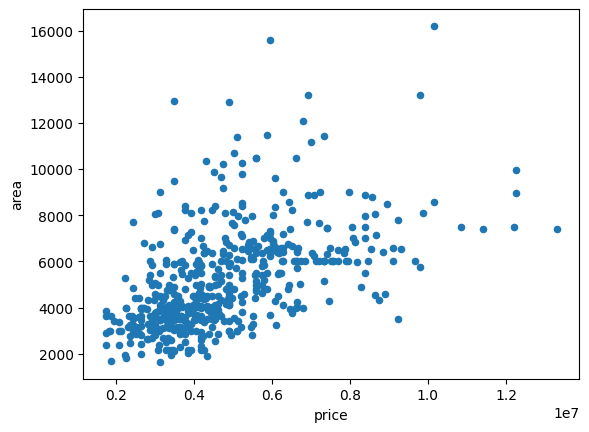

In [17]:
df.plot(kind="scatter", x="price", y="area")

This gives us some insights already about the data, in form of a **scatterplot**. For example, we can infer that the house price and area probably have a linear relation, but also that there are several **outliers**. Outliers are values that lie far outside the usual range, and are represented in a scatterplot by the data points that lie far outside. <br> <br>
While `pandas` already gives us a basic scatterplot, we will now see how to better build a scatterplot.

### 4.1 Scatterplots

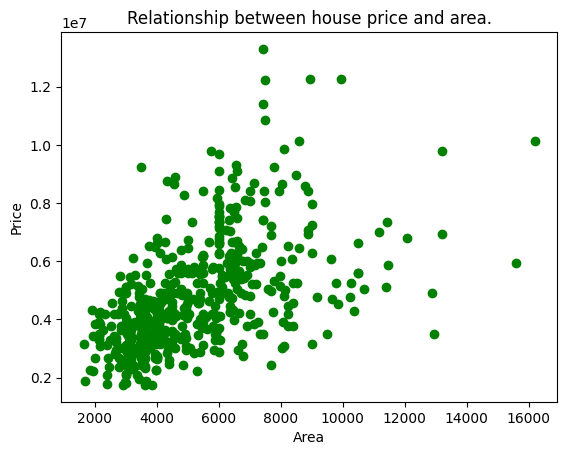

In [60]:
plt.plot(df['area'], df['price'], 'o', color='green') # "o" for circle marker: each data point is a circle
plt.title("Relationship between house price and area.")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

The third parameter in the `plt.plot` function is a marker for your data points. You can use it to customize your dataset with the symbols you want (examples: `'x', '+', 'v', '^', '<'`). You can also mix those examples.

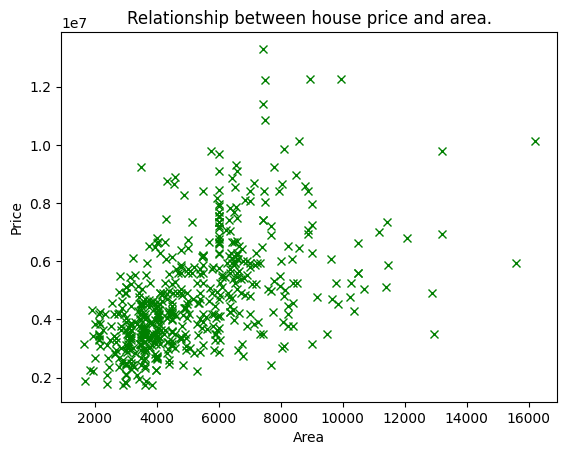

In [ ]:
# Other data point markers
plt.plot(df['area'], df['price'], 'x', color='green') # try: "X", "."
plt.title("Relationship between house price and area.")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

We will first sort the dataset in descending order according to price and area values, to make sure we can plot data that makes sense.

In [50]:
df_sorted = df.sort_values(by=['price', 'area'], ascending=[False, False])
df_sorted.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


You can also draw a **line that connects the dots of your scatterplot**.

/tmp/ipykernel_471676/1471800140.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(df_sorted['price'].head(100), df_sorted['area'].head(100), '-ok', color='green') # try: "X", "."


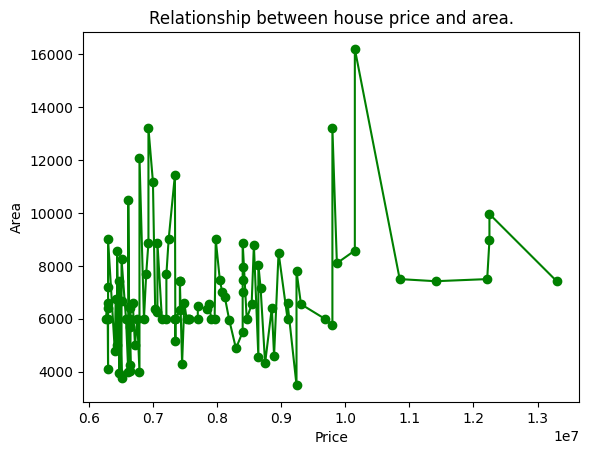

In [63]:
# Other data point markers
plt.plot(df_sorted['price'].head(100), df_sorted['area'].head(100), '-ok', color='green') # try: "X", "."
plt.title("Relationship between house price and area.")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

Another more powerful way of creating scatterplots is to use `plt.scatter`, which allows for more customization. For example, let's see the example below:

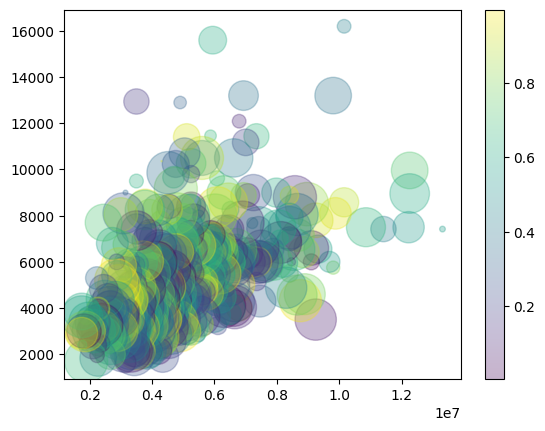

In [ ]:
rng = np.random.RandomState(0)
colors = rng.rand(545) # generates 545 random numbers between 0 and 1
sizes = 1000 * rng.rand(545) # generates 545 random numbers between 0 and 1000
plt.scatter(df_sorted['price'], df_sorted['area'], c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

##### Interpretation:
Higher numbers → colors toward one end of the colormap, lower numbers → colors toward the other. <br>
Larger numbers → larger dots, smaller numbers → smaller dots.

While `plt.scatter` offers a lot of possibilities of making your plot **more appealing**, keep in mind that it might result into **lower efficiency**, especially for big datasets.

#### Exercise 1:
Plot two variables of your choice from the housing price datasets, and try to interpret the result: Do you see any correlation between the two variables?
> Hint: The absence of correlation is also an insight :) <br>
<br>
> Hint: The goal of plotting data is to have a **first, intuitive view** of the dataset, not to be able to certainly say which correlation there is!

In [ ]:
# Insert your code here

### 4.2 Lineplots

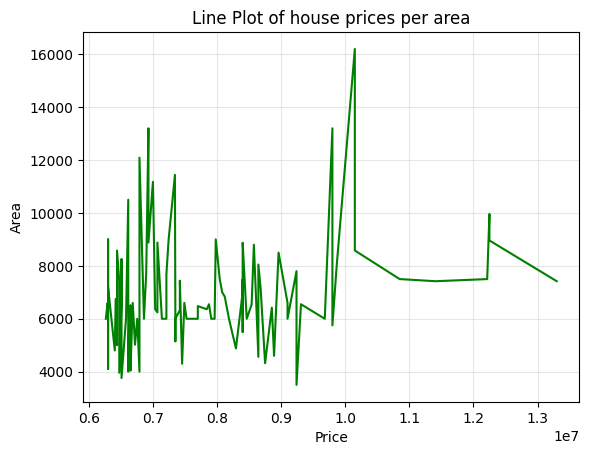

In [15]:
plt.plot(df['price'].head(100), df['area'].head(100), color='green')
plt.xlabel("Price")
plt.ylabel("Area")
plt.title("Line Plot of house prices per area")
plt.grid(True, alpha=0.3)
plt.show()

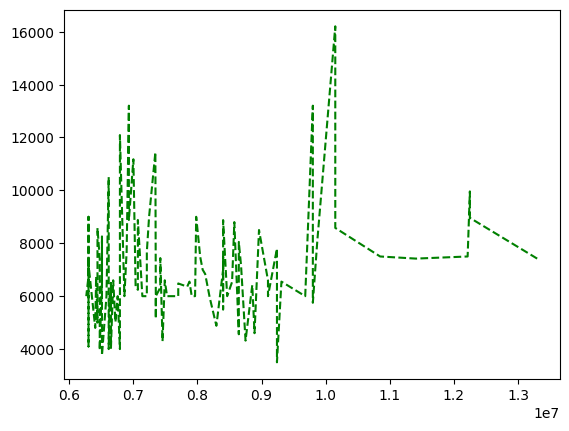

In [76]:
plt.plot(df['price'].head(100), df['area'].head(100), color='green', linestyle='dashed')

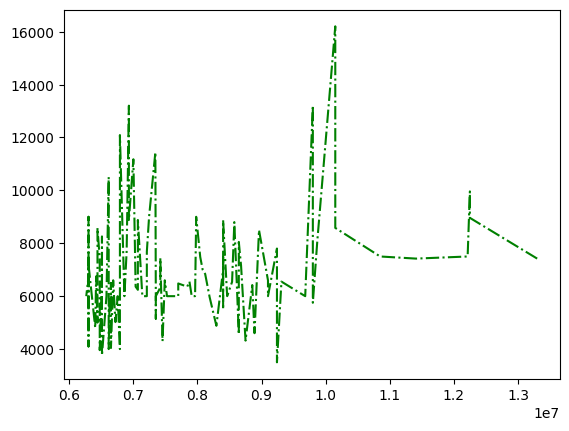

In [77]:
plt.plot(df['price'].head(100), df['area'].head(100), color='green', linestyle='dashdot')

You can also **adjust your x or y axis** to better suit it to your data (e.g. to include all of the data).

(0.0, 20000.0)

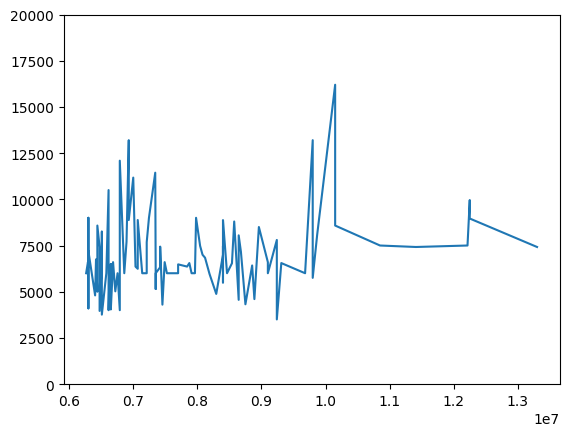

In [88]:
plt.plot(df['price'].head(100), df['area'].head(100))
plt.ylim(0, 20000)

### 4.3 Density plots
Remember: Plotting a continous value.

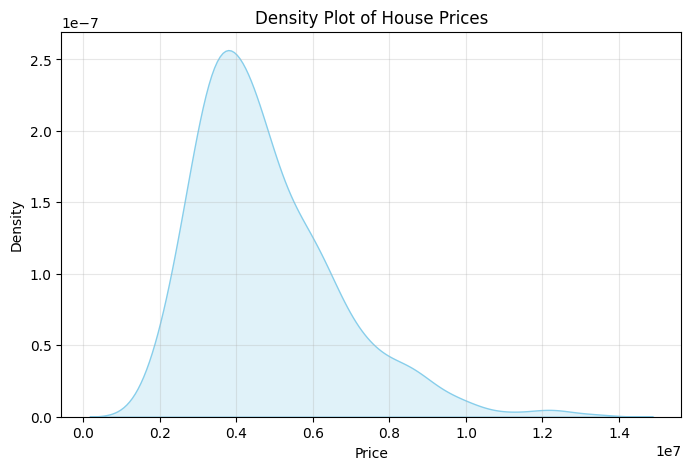

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['price'], fill=True, color='skyblue')  # fill=True adds color under curve
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Density Plot of House Prices")
plt.grid(True, alpha=0.3)
plt.show()

### 4.3 Barplots

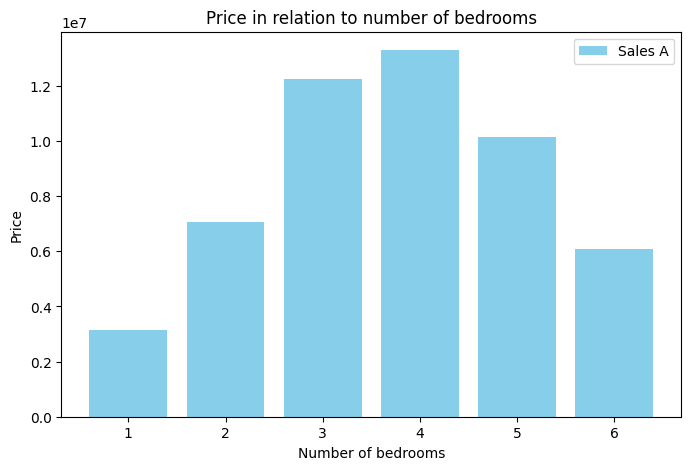

In [ ]:
plt.figure(figsize=(8,5)) # optional
plt.bar(df["bedrooms"], df["price"], color='skyblue', label='Sales A')
#plt.bar(df["price"], df["bedrooms"], color='salmon', alpha=0.6, label='Sales B')  # overlapping bars
plt.title("Price in relation to number of bedrooms")
plt.xlabel("Number of bedrooms")
plt.ylabel("Price")
plt.legend()
plt.show()

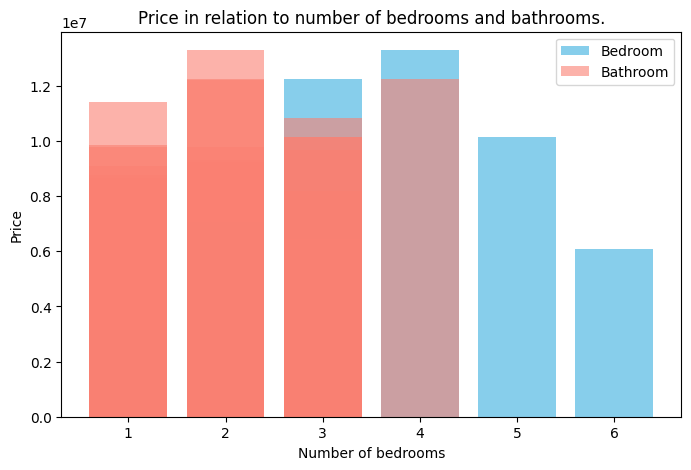

In [109]:
plt.figure(figsize=(8,5)) # optional
plt.bar(df["bedrooms"], df["price"], color='skyblue', label='Bedroom')
plt.bar(df["bathrooms"], df["price"], color='salmon', alpha=0.6, label='Bathroom')  # overlapping bars
plt.title("Price in relation to number of bedrooms and bathrooms.")
plt.xlabel("Number of bedrooms")
plt.ylabel("Price")
plt.legend()
plt.show()

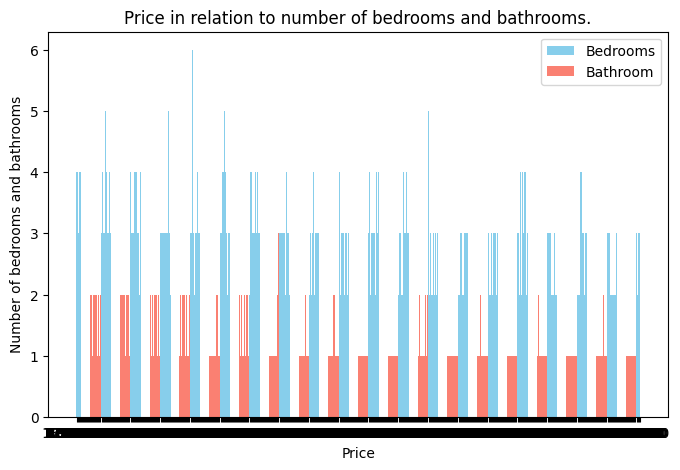

In [ ]:
import numpy as np
x = np.arange(len(df["price"]))  # numeric positions
width = 0.35  # width of each bar

plt.figure(figsize=(8,5))
plt.bar(x - width/2, df["bedrooms"], width, label='Bedrooms', color='skyblue')
plt.bar(x + width/2, df["bathrooms"], width, label='Bathroom', color='salmon')
plt.xticks(x, df["price"])  # set the tick labels to the month names
plt.title("Price in relation to number of bedrooms and bathrooms.")
plt.xlabel("Price")
plt.ylabel("Number of bedrooms and bathrooms")
plt.legend()
plt.show()


### 5. Histograms

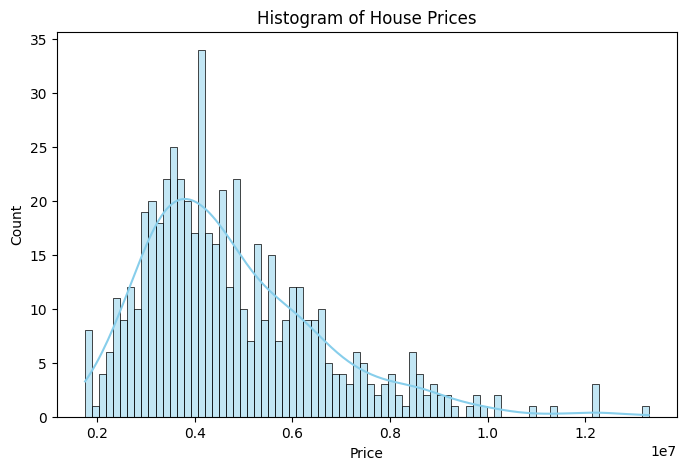

In [ ]:
plt.figure(figsize=(8,5))  # bigger figure
sns.histplot(df['price'], bins=80, color='skyblue', kde=True) # data divided by 80, kde=kernel density estimate (to add bar)

plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Histogram of House Prices")
plt.show()

#### Key takeaway:
Use Python as a tool - but **think critically** about which questions you want to address, and which trends or patterns you want to discover. Mapping price and area of houses? Makes sense! Mapping bedrooms and furnishing status? Maybe not that useful...